In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pickle

# to store your answers
answers = {}

### Read this First

#### We have provided a cell for each of the short and long questions. In some cases the cell also defines useful values. Please do not add additional cells. 

#### We've given an example of what we'd like to see in the first two cells as an example. Please print your answers from the computational cell to appear after it.  If there are two elements, print both one after the other.

### What to hand in
#### CV-2020-Midterm-Exam-A.ipynb and answers.pkl(it will be automatically generated as you finish everything and run till the end)


### Some functions you might find useful


In [2]:
def sk(v) :
  """ Computes the skew-symmetric matrix given a vector v
      Args:
        v: Vector containing 3 values [v0, v1, v2]
      Return:
        sk: Skew symmetric matrix form of vector v
            [0,  -v2,  v1]
            [v2,   0, -v0]
            [-v1, v0,   0]
  """
  return np.array([[0,-v[2],v[1]],[v[2],0,-v[0]],[-v[1],v[0],0]])

### Example Question and Answer

**Q1: What is the product of the matrix H and vector x in the cell below?**

In [3]:
H = np.ones((3,3))
x = np.array([1,1,1])
print(H@x)

[3. 3. 3.]


## Short Questions (4 pts each, 20 pts total)

**1. Given the homography [1,2,3;4,5,6;7,8,9], what is the projection of the point [1,2]. Please print the resulting 2d coordinate vector from the projective coordinates.**


In [4]:
H = np.array([[1,2,3],[4,5,6],[7,8,9]])
p = np.array([1,2])

#TODO: compute pp, which should be a numpy array of shape(2,). Please do not change the shape of answer, otherwise it will be autograded as incorrect
pp = np.zeros((2,))
pph = H @ np.append(p, 1)
pp[:] = pph[0:2]/pph[-1]
print(pp)

# store the answer. Do not modify this
answers['short1'] = pp # worth 4 points

[0.25  0.625]


**2. Given the convolution kernel S = [0,0,1,2,4,8,4,2,1,0,0] and the derivative kernel  D = [1,-1], compute
(1) the single kernel that combines smoothing by S and computing the derivative as a single kernel.
(2) the single kernel that combines smoothing by S and computing the second derivative as a single kernel.**

In [5]:
S = np.array([ 1, 2, 4, 8, 4, 2, 1])
D = np.array([1,-1])
D2 = np.convolve(D, D, mode='full')

#TODO: compute S1 and S2, i.e. the kernels in (1) and (2)
S1 = np.zeros((8,))
S2 = np.zeros((9,))

S1 = np.convolve(D, S, mode='same')
S2 = np.convolve(D2, S, mode='same')
print(S1)
print(S2)

# store the answer. Do not modify this
answers['short2'] = {}
answers['short2']['S1'] = S1 # worth 2 points
answers['short2']['S2'] = S2 # worth 2 points

[ 1  1  2  4 -4 -2 -1]
[ 0  1  2 -8  2  1  0]


**3.Find the harris corner response given the gradient values in the variable SQ3 using a k value of 0.05. Round to the nearest 100 (use round(X,-2))**

In [6]:
SQ3 = np.array([[1,2],[2,3],[1,3],[-5, 4],[2, 3],[4, -4],[-1,-1]])

#TODO: compute edgeresponse
edgeresponse = 0.0
k = 0.05

# find the H matrix
grad_x2 = np.sum(SQ3[:,0]**2)
grad_xy = np.sum(SQ3[:,0] * SQ3[:,1])
grad_y2 = np.sum(SQ3[:,1]**2)
H = np.array([[grad_x2, grad_xy], [grad_xy, grad_y2]])

# eigenvalues and compute the response
eigs = np.linalg.eigvals(H)
edgeresponse = eigs[0]*eigs[1] - k*(eigs[0] + eigs[1])**2

print(round(edgeresponse, -2))

# store the answer. Do not modify this
answers['short3'] = round(edgeresponse,-2) # worth 4 points

2300.0


**4. Compute the F matrix from the values given below and then compute the coefficients of the epipolar line in the left image for the point [3, 4] in the right image**

K = [10, 0, 0; 0, 10, 0; 0, 0, 1];  T = [1,1,1];  R = I

In [7]:
K = np.array([[10,0,0],[0,10,0],[0,0,1]])
invK = np.linalg.inv(K)
T = np.array([1,1,1])
R = np.identity(3)

#TODO: Compute F and compute line parameters
F = np.zeros((3,3))
E = sk(T) @ R
F = invK @ E @ invK

lineresultasarray = np.zeros((3,))
pt = np.array([3, 4, 1])
lineresultasarray = F @ pt


print(F)
print(lineresultasarray)

# store the answer. Do not modify this
answers['short4'] = {}
answers['short4']['F'] = F # 2 points
answers['short4']['epipolar'] = lineresultasarray # 2 points

[[ 0.   -0.01  0.1 ]
 [ 0.01  0.   -0.1 ]
 [-0.1   0.1   0.  ]]
[ 0.06 -0.07  0.1 ]


**5.Project the point [0,0,0] given the following intrinsic, extrinsic camera parameters:**

Scale parameters = 10; 

Optical center = (100, 100)

Rotation by 90 degrees around the z axis

Translation value of [0,0, 500]

In [8]:
# helpful functions
rotatex = lambda phi: np.array([[1, 0, 0],[0, np.cos(phi), -np.sin(phi)], [0, np.sin(phi), np.cos(phi)]])
rotatey = lambda theta: np.array([[np.cos(theta), 0, np.sin(theta)],[0, 1, 0],[-np.sin(theta), 0, np.cos(theta)]])
rotatez = lambda xi: np.array([[np.cos(xi), -np.sin(xi), 0],[np.sin(xi), np.cos(xi), 0], [0, 0, 1]])

# given
p = np.array([0,0,0,1])
K = np.array([[10, 0, 100],[0, 10, 100],[0,0,1]])
t = np.array([[0,0, 500]])
R = rotatez(np.pi/2)


# Compute camera model matrix M and project point to coordinates u and v
M = np.zeros((3,4))
pp = np.zeros((2,))

Mint = np.hstack((K, np.zeros((3,1))))
Mext = np.eye(4)
Mext[0:3,0:3] = R
Mext[0:3,-1] = t

M = Mint @ Mext
pp_unscaled = M @ p
pp = pp_unscaled[0:2]/pp_unscaled[-1]

print(M)
print(pp)

# store the answer. Do not modify this
answers['short5'] = {}
answers['short5']['M'] = M # 2 points
answers['short5']['pp'] = pp # 2 points

[[ 6.123234e-16 -1.000000e+01  1.000000e+02  5.000000e+04]
 [ 1.000000e+01  6.123234e-16  1.000000e+02  5.000000e+04]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  5.000000e+02]]
[100. 100.]


### **Long Questions (5 pts each, 15 pts total)**

**1. Given the image L1,  compute the histogram of directions of nonzero gradients (not weighted by gradient magnitude). Use a derivative of Gaussian filter with sigma of 1.0. Your histogram should quantize to 4 quadrants -- 0 to 90, 91-180, 181-270, and 271-360. Print the histogram rounded to the nearest 10.**

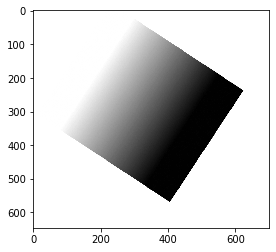

In [9]:
L1 = cv2.cvtColor(cv2.imread('L1-A.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(L1, cmap='gray')

In [10]:
from scipy.ndimage import gaussian_filter

#todo: compute dir
sigma = 1
grad_y = gaussian_filter(L1, (sigma, 0), order=1)
grad_x = gaussian_filter(L1, (0, sigma), order=1)
mag = np.sqrt(grad_x**2 + grad_y**2)
dir = np.arctan2(grad_y, grad_x)

histogram = np.zeros(4)
histogram[0] = np.count_nonzero((dir <= np.pi/2) & (dir >= 0) & (mag > 0))
histogram[1] = np.count_nonzero((dir <= np.pi) & (dir > np.pi/2) & (mag > 0))
histogram[2] = np.count_nonzero((dir <= -np.pi/2) & (dir >= -np.pi) & (mag > 0))
histogram[3] = np.count_nonzero((dir < 0) & (dir > -np.pi/2) & (mag > 0))
print(np.round(histogram,-2))

# store the answer. Do not modify this
answers['long1'] = np.round(histogram,-2) # 5 points

[5400.    0.    0.    0.]


**2. Compute SAD, SSD, and NCC of two image patches L2a and L2b**

SAD:  71809436
SSD:  3136.16
NCC:  0.01


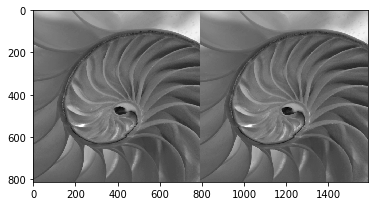

In [11]:
L2a = cv2.cvtColor(cv2.imread('L2a-A.png'), cv2.COLOR_BGR2GRAY)
L2b = cv2.cvtColor(cv2.imread('L2b-A.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(np.concatenate((L2a, L2b), axis=1), cmap='gray')

#TODO: compute SAD, SSD, and NCC
SAD = np.abs(L2a - L2b).sum()
SSD = np.sqrt(np.sum((L2a - L2b)**2))
NCC = np.sum(L2a * L2b)/np.linalg.norm(L2a)/np.linalg.norm(L2b)


print("SAD: ", round(SAD, 2))
print("SSD: ", round(SSD, 2))
print("NCC: ", round(NCC, 2))

# store the answer. Do not modify this
answers['long2'] = {}
answers['long2']['SAD'] = round(SAD, 2) # 2 points
answers['long2']['SSD'] = round(SSD, 2) # 1.5 points
answers['long2']['NCC'] = round(NCC, 2) # 1.5 points

**3. Given the two images L2a and L2b above, compute the direction of motion expressed as an angle in degrees rounded to the nearest 10 degrees (i.e. 0, 10, 20, 30 etc) . Use round with parameter -1, and filter both images with gaussian sigma=2 before computing gradients.**

**Hint: To solve for this, recall the optical flow equation $Ad=b$, where $A$ is the $n\times 2$ matrix of spatial gradients, $d$ is the $[u, v]$ motion between the two images, and $b$ is the difference between the two images after Gaussian filtering.**

In [12]:
sigma = 2
L2ag = gaussian_filter(L2a, sigma, order=0)
L2bg = gaussian_filter(L2b, sigma, order=0)

i_y, i_x = np.gradient(L2ag)
i_t = L2ag - L2bg #TODO: compute image difference

gx = np.resize(i_x, (-1, 1))
gy = np.resize(i_y, (-1, 1))

b = np.resize(i_t, (-1, 1))
A = np.concatenate((gx, gy), axis=1)
d = np.zeros((2,1)) #TODO: compute d
d = np.linalg.lstsq(A, b, rcond=None)[0]
print(b)
print(A)
print(d)
print(np.round(np.arctan2(d[1], d[0]) * 180/np.pi, -1)[0])

# store the answer. Do not modify this
answers['long3'] = {}
answers['long3']['b'] = np.linalg.norm(b) # 1 point
answers['long3']['A'] = np.linalg.norm(A) # 1 point
answers['long3']['d'] = d # 2 points
answers['long3']['angle'] = np.round(np.arctan2(d[1], d[0]) * 180/np.pi, -1)[0] # 1 point

[[253]
 [253]
 [253]
 ...
 [253]
 [  0]
 [  3]]
[[  0.  255. ]
 [  0.  255. ]
 [  0.5 255. ]
 ...
 [127.  255. ]
 [  0.    0. ]
 [  0.5   0. ]]
[[0.14345672]
 [1.61590486]]
80.0


In [13]:
# save your answers to answers.pkl. Please submit answers.pkl along with your notebook
pickle.dump(answers,open('answers.pkl', 'wb'))